In [1]:
import pandas as pd
import geopandas as gp 
import json
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline
from tqdm import tqdm
import glob
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress

In [2]:
files = glob.glob('../BL_Work/openPrescribe/serialized/*.gz')
print files

['../BL_Work/openPrescribe/serialized/201009.gz', '../BL_Work/openPrescribe/serialized/201008.gz', '../BL_Work/openPrescribe/serialized/201011.gz', '../BL_Work/openPrescribe/serialized/201010.gz', '../BL_Work/openPrescribe/serialized/201012.gz']


In [3]:
pdp = pd.read_csv(files[0])

In [4]:
patients = pd.read_csv('../BL_Work/grondTruths/GP_SYOA.csv')

In [5]:
patients = patients.dropna()

In [6]:
# patients[pd.isna(patients['TOTAL_ALL'])]

In [7]:
pdp.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,Q30,5D7,A86001,0501013B0AAAJAJ,Amoxicillin_Oral Susp 125mg/5ml,1.0,1.69,1.59,100.0,201009.0,NE6 1SG,NaN,NaN,NaN,NaN
1,1,Q30,5D7,A86003,0101010G0AAABAB,Co-Magaldrox_Susp 195mg/220mg/5ml S/F,44.0,124.96,116.45,25800.0,201009.0,NE1 8DQ,NaN,NaN,NaN,NaN
2,2,Q30,5D7,A86003,0101010G0BBABAB,Maalox_Susp 195mg/220mg/5ml S/F,1.0,5.58,5.17,1000.0,201009.0,NE1 8DQ,NaN,NaN,NaN,NaN
3,3,Q30,5D7,A86003,0101010G0BCABAB,Mucogel_Susp 195mg/220mg/5ml S/F,1.0,1.71,1.61,500.0,201009.0,NE1 8DQ,NaN,NaN,NaN,NaN
4,4,Q30,5D7,A86003,0101010L0BBABAA,Asilone_Susp S/F,1.0,1.95,1.83,500.0,201009.0,NE1 8DQ,NaN,NaN,NaN,NaN


In [8]:
patients.head()

,PRACTICE_CODE,POSTCODE,PARENT_ORGANISATION_CODE,NHSE_AREA_TEAM,NHSE_REGION,Total_All,Total_Male,Total_Female,MALE_0_1,MALE_1_2,...,FEMALE_86_87,FEMALE_87_88,FEMALE_88_89,FEMALE_89_90,FEMALE_90_91,FEMALE_91_92,FEMALE_92_93,FEMALE_93_94,FEMALE_94_95,Female_95+
0,A81001,TS18 1HU,00K,Q45,Y54,4180,2036,2144,23,25,...,13,8,8,4,6,4,4,5,7,6
1,A81002,TS18 2AW,00K,Q45,Y54,19621,9665,9956,77,114,...,56,43,40,33,38,23,18,11,11,26
2,A81003,TS26 8DB,00K,Q45,Y54,3470,1830,1640,16,16,...,4,2,2,5,7,2,3,0,1,2
3,A81004,TS1 3BE,00M,Q45,Y54,9078,4694,4384,33,42,...,24,17,10,19,15,10,7,5,4,20
4,A81005,TS14 7DJ,00M,Q45,Y54,7918,3851,4067,33,34,...,26,21,18,10,17,12,7,9,6,15


In [9]:
#create dictionary of patients registered per practice
practice_patient_dict = {}
for index , row in patients.iterrows():
    practice_patient_dict[row['PRACTICE_CODE']] = row['Total_All']

In [10]:
prevalence_df = pd.read_csv('../BL_Work/grondTruths/PREVALENCE.csv')

In [11]:
diseaseMatched = json.load(open('../processed/DiseasesMatched.json','rb'))

In [19]:
diseaseMatched.keys()

[u'psoriasis',
 u'gastroparesis',
 u'"multiple+sclerosis"',
 u'"crohn\'s+disease"',
 u'"interstitial+cystitis"',
 u'rheumatoid',
 u'parkinsons',
 u'dysautonomia',
 u'"kidney+stones"',
 u'"chronic+fatigue+syndrome"',
 u'bipolar',
 u'hypothyroidism',
 u'"sleep+apnea"',
 u'"Meniere\'s disease"',
 u'dementia',
 u'"irritable+bowel+syndrome"',
 u'depression',
 u'diabetes']

In [13]:
%store -r Drug_code

In [14]:
Drug_code

{'0101010M0': {'disease': u'kidney stones',
  'disease_given_drug': 0.007575757575757576,
  'name': 'Magaldrate'},
 '0102000AB': {'disease': u'irritable bowel syndrome',
  'disease_given_drug': 0.0036199095022624436,
  'name': 'Hyoscyamine Sulphate'},
 '0102000AD': {'disease': u'irritable bowel syndrome',
  'disease_given_drug': 0.008429926238145416,
  'name': 'Pinaverium Bromide'},
 '0102000AG': {'disease': u'irritable bowel syndrome',
  'disease_given_drug': 0.10238095238095238,
  'name': 'Tegaserod Maleate'},
 '0103010S0': {'disease': u'rheumatoid',
  'disease_given_drug': 0.09,
  'name': 'Ranitidine Bismuth Citrate'},
 '0103010T0': {'disease': u'rheumatoid',
  'disease_given_drug': 0.09,
  'name': 'Ranitidine Hydrochloride'},
 '0104020D0': {'disease': u'diabetes',
  'disease_given_drug': 0.3229166666666667,
  'name': 'Codeine Phosphate Compound Mixtures'},
 '0105010B0': {'disease': u"crohn's disease",
  'disease_given_drug': 0.15555555555555556,
  'name': 'Mesalazine (Systemic)'},


In [16]:
# newDict = {k:{'disease_given_drug':Drug_code[k]['disease_given_drug'],'disease':Drug_code[k]['disease']} for k in Drug_code if Drug_code[k]['disease'] == 'diabetes'}
# print newDict

In [20]:
def diseasePrevalence( disease_presc, practice_population, drug_prob , totalDrugs):
    diseaseGP_prevalence= []
    for name , group in disease_presc.groupby('3'):
        for code in drug_prob:
            if code in name:
                prev = ((float(float(len(group))/float(totalDrugs)))* drug_prob[code]['disease_given_drug'])
                diseaseGP_prevalence.append(prev)
    return float(np.sum(diseaseGP_prevalence))#/practice_population


def subDict(drug_dict, disease):
    newDict = {k:{'disease_given_drug':drug_dict[k]['disease_given_drug'],'disease':drug_dict[k]['disease']} for k in drug_dict if drug_dict[k]['disease'] == disease}
    return newDict

In [21]:
presc_Disease_prevalence = {}
missing_pract = []
for f in tqdm(files[:1]):
    month = f.split('/')[-1].split('.')[0]
    print "Working with %s month"%(month)
    presc_Disease_prevalence[month] = {}
    pdp = pd.read_csv(f,compression='gzip')
    print "there are in total %d practices in this file"%(len(set(pdp['2'])))
    pdp['10']= pdp['10'].str.split(' ', n = 1, expand = True)
    
    for d in tqdm(['diabetes','depression','dementia','rheumatoid','parkinsons']):
#     for d in tqdm(diseaseMatched):
        key = d.replace('\"','').replace('+',' ').replace('\\','')
        if key not in  presc_Disease_prevalence[month]:
             presc_Disease_prevalence[month][key] = {}
        for name , group in pdp.groupby('2'):
            disease_df = group[group['12'] == key]
            all_diseases = group[group['12'].notnull()]
            total_drugs = len(all_diseases)
            if len(disease_df) == 0:
                presc_Disease_prevalence[month][key][name] = 0.0
            else:
                try :
                    practice_pop =  practice_patient_dict[name.strip()]
                except:
                    missing_pract.append(name)
                    continue
                subDiseaseDict = subDict(Drug_code,key)
                presc_Disease_prevalence[month][key][name] = diseasePrevalence (disease_df , practice_pop ,subDiseaseDict , total_drugs)
           

  0%|          | 0/1 [00:00<?, ?it/s]

Working with 201009 month
there are in total 10265 practices in this file



100%|██████████| 1/1 [06:30<00:00, 390.09s/it]


In [1991]:
%store  -r compre_postCode_dict
compre_postCode_dict

{'Adur': {'areaId': ['E07000223'],
  'postcodes': ['BN41', 'BN15', 'BN14', 'BN42', 'BN43']},
 'Allerdale': {'areaId': ['E07000026'],
  'postcodes': ['CA13', 'CA15', 'CA14', 'CA7', 'CA12', 'CA5']},
 'Amber Valley': {'areaId': ['E07000032'],
  'postcodes': ['DE4',
   'DE22',
   'DE21',
   'DE5',
   'NG16',
   'DE6',
   'DE56',
   'DE55',
   'DE75',
   'DE7']},
 'Arun': {'areaId': ['E07000224'],
  'postcodes': ['BN18',
   'BN17',
   'BN16',
   'BN13',
   'BN12',
   'PO21',
   'PO18',
   'PO20',
   'PO22']},
 'Ashfield': {'areaId': ['E07000170'],
  'postcodes': ['NG17', 'NG6', 'NG15', 'NG18', 'NG19']},
 'Ashford': {'areaId': ['E07000105'],
  'postcodes': ['CT4',
   'TN30',
   'TN17',
   'TN18',
   'ME13',
   'ME17',
   'TN23',
   'TN24',
   'TN25',
   'TN26',
   'TN27']},
 'Aylesbury Vale': {'areaId': ['E07000004'],
  'postcodes': ['HP19',
   'HP18',
   'HP17',
   'HP16',
   'MK19',
   'MK18',
   'OX9',
   'OX5',
   'MK17',
   'HP4',
   'OX33',
   'OX27',
   'HP22',
   'HP23',
   'HP20',
 

In [22]:
store -r GP_postcodes

In [23]:
presc_Disease_prevalence.keys()

['201009']

In [24]:
filtered = [k for k in presc_Disease_prevalence['201009']['depression'].values() if not np.isnan(k)]

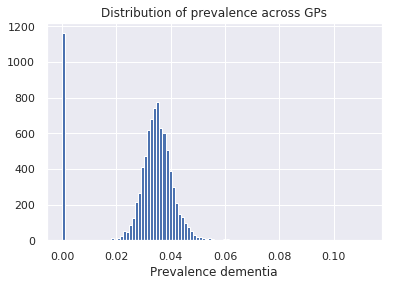

In [25]:
plt.hist(filtered,bins=100)
ax = plt.gca()
ax.set_title("Distribution of prevalence across GPs")
ax.set_xlabel("Prevalence dementia")
ax.set_ylabel("")

In [35]:
# presc_Disease_prevalence

In [26]:
disease_GP_level = presc_Disease_prevalence['201009']['depression']

In [31]:
disease_GP_level

{'E84702': 0.03346604141784244,
 'Y03108': 0.0,
 'E84701': 0.036923660146492884,
 'E84706': 0.030045345736409358,
 'E84707': 0.0,
 'E84704': 0.03952582343303485,
 'E84705': 0.033909516831539074,
 'Y03101': 0.0,
 'E84708': 0.02888066311410894,
 'E84709': 0.03569895846105681,
 'Y02795': 0.03819818412319312,
 'Y00857': 0.0,
 'Y02066': 0.0,
 'B85014': 0.03454568919638404,
 'B85015': 0.03749550381753358,
 'B85016': 0.03394434659624621,
 'Y03102': 0.0,
 'B85010': 0.036826741683056746,
 'B85011': 0.0342714559803134,
 'B85012': 0.03871101162417371,
 'Y02794': 0.04341450212012106,
 'B85018': 0.033345029373988755,
 'B85019': 0.036162139323061726,
 'N81032': 0.031483702530063475,
 'N81033': 0.04124322134192851,
 'N81030': 0.029863727144809234,
 'N81031': 0.03273446982174481,
 'N81036': 0.04364967127943778,
 'N81037': 0.039521823206657924,
 'N81034': 0.03772815363025019,
 'N81035': 0.03203082208846894,
 'N81038': 0.032327139640675975,
 'N81039': 0.03195630013588601,
 'Y00855': 0.0,
 'N82046': 0.03

In [27]:
groundTruth = pd.read_csv('../BL_Work/prevalence/DEP.csv')

In [28]:
groundTruth = groundTruth.dropna()

In [29]:
groundTruth.head()

,Unnamed: 0,disease_prevalence,postcode,practice_code,registered
0,0,0.156662,TS18 2AW,A81002,16175
1,1,0.054688,TS1 3BE,A81004,7808
2,2,0.096943,TS14 7DJ,A81005,6509
3,3,0.116453,TS18 2AT,A81006,10837
4,4,0.157344,TS24 7PW,A81007,7830


In [34]:
gt_gp = {}
for index , row in groundTruth.iterrows():
    gt_gp[row['practice_code']] = row['disease_prevalence']

In [37]:
common_keys = [k for k in groundTruth['practice_code'] if k in practice_patient_dict.keys()]
common_keys = list(set(disease_GP_level.keys()).intersection(common_keys))
len(common_keys)

7272

In [38]:
featArray_GP = np.zeros((len(common_keys),3))

for i in range(len(common_keys)):
    key = common_keys[i]
    featArray_GP[i,0] = gt_gp[key]
    featArray_GP[i,1] = disease_GP_level[key]
    featArray_GP[i,2] = np.log10(practice_patient_dict[key])

In [2086]:

gt = []
presc = []
for index , row in groundTruth.iterrows():
    if row['practice_code'] in disease_GP_level:
        gt.append(row['disease_prevalence'])
        presc.append(np.mean(disease_GP_level[row['practice_code'] ]))

In [2087]:
# gt

In [2088]:
from scipy.stats import pearsonr
pearsonr(presc,gt)

(0.4040739768668962, 8.174521600279789e-284)

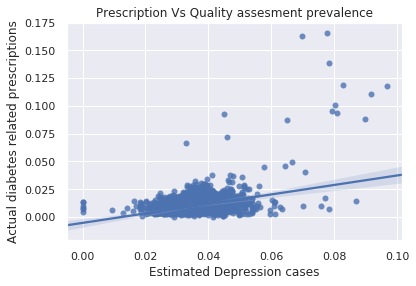

In [2089]:
sns.regplot(x=presc , y = gt)
ax = plt.gca()
ax.set_title("Prescription Vs Quality assesment prevalence")
ax.set_xlabel("Estimated Depression cases")
ax.set_ylabel("Actual diabetes related prescriptions")

In [2090]:
#  pdp = pd.read_csv(f,compression='gzip')

In [2091]:
# %store -r postCodeDict
%store  -r compre_postCode_dict

In [2092]:
postCodeDict = compre_postCode_dict

In [2093]:
store -r Area_values

In [2094]:
area_patients = {}
for k in GP_postcodes:
    postCode = GP_postcodes[k]
    for area in postCodeDict:
        if postCode in postCodeDict[area]['postcodes']:
            try:
                if area not in area_patients:
                    area_patients[area] = practice_patient_dict[k]
                else:
                    area_patients[area] += practice_patient_dict[k]
            except:
                continue

area_patients_filtered = {k: area_patients[k] for k in area_patients if not np.isnan(area_patients[k] )}

In [2096]:
Area_values

{u'Adur': {'patients': 133765.0, 'population': 61929},
 u'Allerdale': {'patients': 108473.0, 'population': 96268},
 u'Amber Valley': {'patients': 386927.0, 'population': 122746},
 u'Arun': {'patients': 213991.0, 'population': 150877},
 u'Ashfield': {'patients': 252315.0, 'population': 120131},
 u'Ashford': {'patients': 243080.0, 'population': 120116},
 u'Aylesbury Vale': {'patients': 481973.0, 'population': 176867},
 u'Babergh': {'patients': 168634.0, 'population': 87917},
 u'Barking and Dagenham': {'patients': 277996.0, 'population': 190560},
 u'Barnet': {'patients': 723280.0, 'population': 363956},
 u'Barnsley': {'patients': 427077.0, 'population': 233671},
 u'Barrow-in-Furness': {'patients': 92644.0, 'population': 68446},
 u'Basildon': {'patients': 291740.0, 'population': 176474},
 u'Basingstoke and Deane': {'patients': 333885.0, 'population': 170492},
 u'Bassetlaw': {'patients': 234610.0, 'population': 112248},
 u'Bath and North East Somerset': {'patients': 264739.0, 'population': 

In [2104]:
GP_postcodes

{'E84702': 'NW2',
 'Y03108': 'HU9',
 'E84701': 'HA0',
 'E84706': 'NW9',
 'E84707': 'HA3',
 'E84704': 'NW2',
 'E84705': 'NW10',
 'Y03101': 'L12',
 'E84708': 'NW10',
 'E84709': 'HA9',
 'Y03105': 'TW15',
 'Y03104': 'NG12',
 'Y03106': 'SE7',
 'H82656': 'RH16',
 'B85014': 'WF16',
 'B85015': 'WF17',
 'B85016': 'HD1',
 'B85010': 'HD5',
 'B85011': 'HD7',
 'B85012': 'WF16',
 'B85018': 'WF17',
 'B85019': 'WF14',
 'J83016': 'BA14',
 'N81032': 'CW11',
 'N81033': 'SK9',
 'N81030': 'WA6',
 'N81031': 'CW6',
 'N81036': 'WA2',
 'N81037': 'WA8',
 'N81034': 'CH2',
 'N81035': 'WA8',
 'N81038': 'SY14',
 'N81039': 'CW10',
 'N82046': 'L15',
 'J83017': 'SN9',
 'N82041': 'L13',
 'N82048': 'L9',
 'N82049': 'L4',
 'G82162': 'ME8',
 'G82163': 'DA12',
 'G82160': 'CT21',
 'G82161': 'ME5',
 'Y00100': 'BD18',
 'Y00453': 'PL6',
 'G82164': 'ME16',
 'G82165': 'CT4',
 'G82168': 'ME7',
 'Y00108': 'NG2',
 'L83139': 'EX31',
 'Y00458': 'B61',
 'Y00459': 'WR5',
 'J83014': 'SP11',
 'Y01851': 'WF13',
 'Y01852': 'OL12',
 'Y01857

In [2098]:
disease_GP_level

{'E84702': 0.03346604141784244,
 'Y03108': 0.0,
 'E84701': 0.036923660146492884,
 'E84706': 0.030045345736409358,
 'E84707': 0.0,
 'E84704': 0.03952582343303485,
 'E84705': 0.033909516831539074,
 'Y03101': 0.0,
 'E84708': 0.02888066311410894,
 'E84709': 0.03569895846105681,
 'Y02795': 0.03819818412319312,
 'Y00857': 0.0,
 'Y02066': 0.0,
 'B85014': 0.03454568919638404,
 'B85015': 0.03749550381753358,
 'B85016': 0.03394434659624621,
 'Y03102': 0.0,
 'B85010': 0.036826741683056746,
 'B85011': 0.0342714559803134,
 'B85012': 0.03871101162417371,
 'Y02794': 0.04341450212012106,
 'B85018': 0.033345029373988755,
 'B85019': 0.036162139323061726,
 'N81032': 0.031483702530063475,
 'N81033': 0.04124322134192851,
 'N81030': 0.029863727144809234,
 'N81031': 0.03273446982174481,
 'N81036': 0.04364967127943778,
 'N81037': 0.039521823206657924,
 'N81034': 0.03772815363025019,
 'N81035': 0.03203082208846894,
 'N81038': 0.032327139640675975,
 'N81039': 0.03195630013588601,
 'Y00855': 0.0,
 'N82046': 0.03

In [2099]:
practice_patient_dict

{'E84702': 2855,
 'E84701': 3873,
 'E84706': 2212,
 'E84704': 2285,
 'E84705': 2491,
 'E84708': 2178,
 'E84709': 10160,
 'Y02795': 2630,
 'B85014': 9805,
 'B85015': 9006,
 'B85016': 9377,
 'B85010': 6603,
 'B85011': 6274,
 'B85012': 10602,
 'B85018': 8788,
 'B85019': 16935,
 'N81032': 22494,
 'N81033': 7711,
 'N81030': 12032,
 'N81031': 5588,
 'N81036': 6141,
 'N81037': 8008,
 'N81034': 12096,
 'N81035': 10855,
 'N81038': 6511,
 'N81039': 10339,
 'N82046': 7877,
 'N82041': 6478,
 'N82048': 6702,
 'N82049': 5215,
 'G82162': 5001,
 'Y00105': 3792,
 'G82160': 11075,
 'G82161': 15023,
 'G82164': 10290,
 'G82165': 9231,
 'Y01851': 2889,
 'M82050': 8056,
 'M82051': 4647,
 'M82054': 3548,
 'M82055': 3981,
 'M82056': 13006,
 'M82057': 3663,
 'M82058': 3549,
 'M82059': 11636,
 'P81212': 4994,
 'H81647': 2326,
 'H81644': 8655,
 'H81643': 2232,
 'H81642': 3021,
 'H81641': 3383,
 'P81214': 4546,
 'P81215': 6131,
 'E85617': 2881,
 'M82620': 3731,
 'F81014': 15873,
 'F81015': 6698,
 'F81016': 5115,


In [2100]:
filt1 = list(set(disease_GP_level.keys()).intersection(practice_patient_dict.keys()))

In [2101]:
filteredGPs = list(set(groundTruth['practice_code']).intersection(filt1))
len(filteredGPs)

7273

In [2105]:
area_prevalence = {}
GP_Disease_cases = {}
GP_registerd_patients = {}
GP_patients_per_GP = {}
for k in filteredGPs:
    postCode = GP_postcodes[k]
    for area in area_patients_filtered:
        if area not in area_prevalence:
            area_prevalence[area]= {}
            area_prevalence[area]['GP'] = []
            GP_Disease_cases[area] = []
            GP_registerd_patients[area] = []
        if postCode in postCodeDict[area]['postcodes']:
            if not np.isnan(disease_GP_level[k]) and k in practice_patient_dict:
                area_prevalence[area]['GP'].append(float(disease_GP_level[k])*float(practice_patient_dict[k]))
#                 area_prevalence[area]['GP'].append(float(disease_GP_level[k][0]))
                GP_Disease_cases[area].append(disease_GP_level[k])
                GP_registerd_patients[area].append(practice_patient_dict[k])
for area in area_prevalence:
    area_prevalence[area]['norm'] = float(np.sum(area_prevalence[area]['GP']))/float(area_patients_filtered[area]+1)
#     area_prevalence[area]['norm'] = float(np.mean(area_prevalence[area]['GP']))
    GP_patients_per_GP[area] =  float(area_patients_filtered[area])/len(area_prevalence[area]['GP'])
        

In [2106]:
# area_prevalence = presc_Disease_prevalence_area['201012']['depression']

In [2107]:
# area_prevalence['Westminster']

In [2136]:
Area_Gt = pd.read_csv('../BL_Work/prevalence_LA_level/MH_GP_to_LA_level.csv')

In [2137]:
# Area_Gt

In [2138]:
area_prevalence['City of London']

{'GP': [270.04525222401264,
  314.12085201380324,
  98.55192636826146,
  340.7781270394692,
  560.3355492580212,
  330.69144863624985,
  331.00037695453824,
  368.2101547707974,
  101.46837097314499,
  355.3173989885936,
  411.41690926865493],
 'norm': 0.03581833708629215}

In [2157]:
%store -r lon_boro

In [2158]:
len(lon_boro)

43

In [2168]:
common_keys = set(area_prevalence.keys()).intersection(Area_Gt['Area'])
# common_keys = set(area_prevalence.keys()).intersection(lon_boro)
len(common_keys)

308

In [2169]:
# area_prevalence['Westminster']

# GP_Disease_cases['City of London']

# sns.distplot(GP_Disease_cases['City of London'], hist=False)
# sns.distplot(GP_Disease_cases['Westminster'], hist=False)

# sns.distplot(GP_registerd_patients['City of London'], hist=False)
# sns.distplot(GP_registerd_patients['Westminster'] , hist=False)

# len(area_prevalence['Westminster']['GP'] )

# GP_registerd_patients['Westminster']

# area_patients_filtered['City of London']

In [2170]:
subAreas = common_keys


In [2171]:
subAreas

{'Adur',
 'Allerdale',
 'Amber Valley',
 'Arun',
 'Ashfield',
 'Ashford',
 'Aylesbury Vale',
 'Babergh',
 'Barking and Dagenham',
 'Barnet',
 'Barnsley',
 'Barrow-in-Furness',
 'Basildon',
 'Basingstoke and Deane',
 'Bassetlaw',
 'Bath and North East Somerset',
 'Bedford',
 'Bexley',
 'Birmingham',
 'Blaby',
 'Blackburn with Darwen',
 'Blackpool',
 'Bolsover',
 'Bolton',
 'Boston',
 'Bournemouth',
 'Bracknell Forest',
 'Bradford',
 'Braintree',
 'Breckland',
 'Brent',
 'Brentwood',
 'Brighton and Hove',
 'Bristol, City of',
 'Broadland',
 'Bromley',
 'Bromsgrove',
 'Broxbourne',
 'Broxtowe',
 'Burnley',
 'Bury',
 'Calderdale',
 'Cambridge',
 'Camden',
 'Cannock Chase',
 'Canterbury',
 'Carlisle',
 'Castle Point',
 'Central Bedfordshire',
 'Charnwood',
 'Chelmsford',
 'Cheltenham',
 'Cherwell',
 'Cheshire East',
 'Cheshire West and Chester',
 'Chesterfield',
 'Chichester',
 'Chiltern',
 'Chorley',
 'Christchurch',
 'City of London',
 'Colchester',
 'Copeland',
 'Corby',
 'Cornwall',
 'C

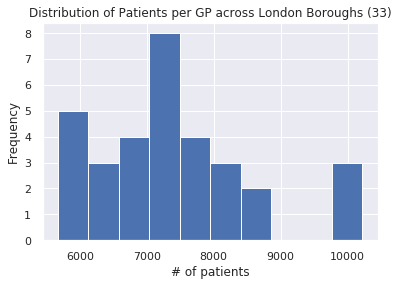

In [2172]:
# sns.distplot([GP_patients_per_GP[k] for k in keys ],bins=33 , hist= False , kde=True)
plt.hist([GP_patients_per_GP[k] for k in keys ],bins=10 )
ax = plt.gca()
ax.set_title("Distribution of Patients per GP across London Boroughs (33)")
ax.set_xlabel("# of patients")
ax.set_ylabel("Frequency")

In [2173]:
len(Area_Gt)

348

In [2181]:
predict = []
gt = []
names = []
predict_area_agg_GP = {}
gt_area_agg_GP = {}
for index, row in Area_Gt.iterrows():
    if row['Area'].strip() in subAreas:
#         if area_patients[row['Area'].strip()] > 200000:
        predict.append(area_prevalence[row['Area']]['norm'])
        names.append(row['Area'].strip())
        gt.append(row['weighted_mean'])
        predict_area_agg_GP[row['Area'].strip()] = area_prevalence[row['Area']]['norm']
        gt_area_agg_GP[row['Area'].strip()] = row['weighted_mean']
#             gt.append(row['prevalence'])

In [2194]:
%store predict_area_agg_GP
%store gt_area_agg_GP

Stored 'predict_area_agg_GP' (dict)
Stored 'gt_area_agg_GP' (dict)


In [2195]:
pearsonr(predict_area_agg_GP.values(),gt_area_agg_GP.values())

(0.2151628323603012, 0.00014157319011600048)

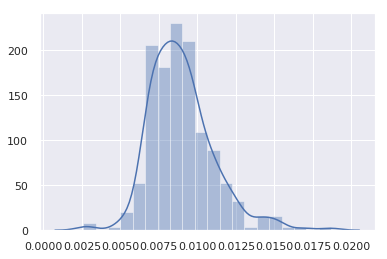

In [2188]:
sns.distplot(gt,bins = 20)

In [2191]:
np.mean(gt) , np.std(gt)

(0.00897430756342447, 0.002096538253223312)

In [2175]:
corr = pearsonr(predict,gt)

In [2183]:
corr

(0.21516283236030118, 0.00014157319011600048)

In [2176]:
def label_point(x, y, val, ax ):
    a = pd.concat({'x': pd.Series(x), 'y':  pd.Series(y), 'val': pd.Series(val)}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

def filterHighestResiduals(gt,predict,names , topK):
    slope, intercept, r_value, p_value, std_err = linregress(predict,gt)
    predicted = [(slope*k)+intercept for k in gt]
    residuals = [abs(v1 - v2) for (v1,v2) in zip(predicted,predict)]
    topKidx = np.argsort(residuals)[-topK:][::-1]
    return [gt[i] for i in topKidx] , [predict[i] for i in topKidx], [names[i] for i in topKidx]

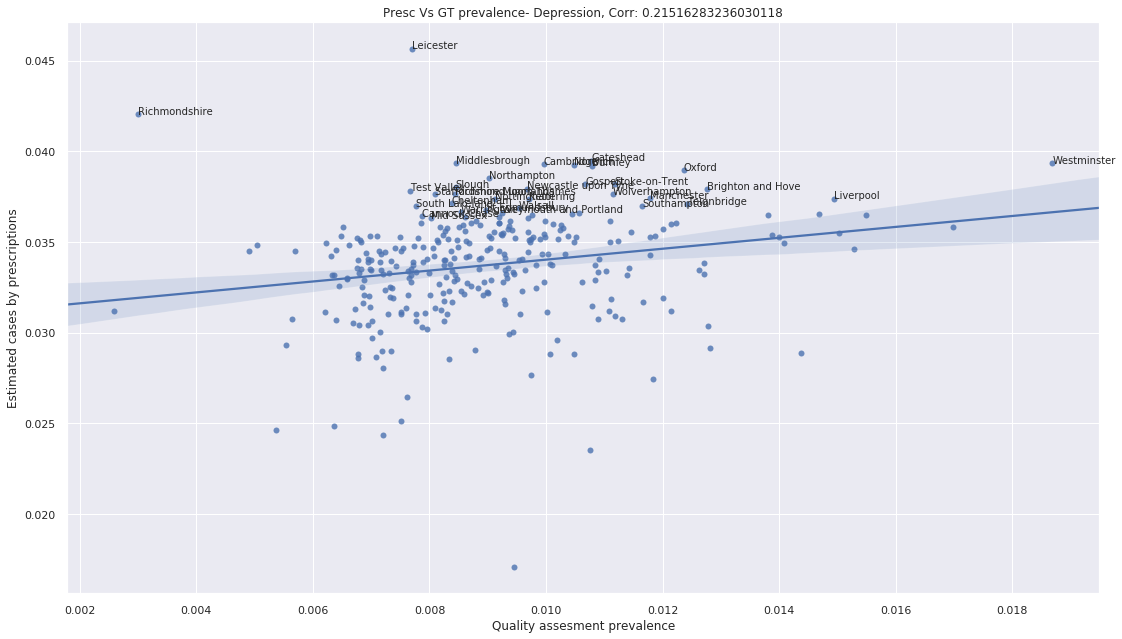

In [2177]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x=gt , y = predict)
ax = plt.gca()
gt_ , predict_ , names_ = filterHighestResiduals(gt, predict , names, 33)
label_point(gt_ , predict_ , names_ , ax)
ax.set_title("Presc Vs GT prevalence- Depression, Corr: " + str(corr[0]) )
ax.set_xlabel("Quality assesment prevalence")
ax.set_ylabel("Estimated cases by prescriptions",)